In [38]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os
array_of_img = [] # Store all the image data
# Read directory function
def read_directory(directory_name):
    filenumber = len([name for name in os.listdir(directory_name) if os.path.isfile(os.path.join(directory_name, name))])
    for i in range(1,filenumber+1):
        img = cv2.imread(directory_name + "/" + str(i)+".jpg")
        array_of_img.append(img)
                         
def SIFT(inputname):
    read_directory(inputname)
    height = array_of_img[0].shape[0]
    #use: len(array_of_img) for looping the image, array_of_img[0],
    #array_of_img[1],array_of_img[2],...for processing each image
    #Start SIFT here
    use = []  
    for _ in range(len(array_of_img) - 1):
        best_idx = -1
        best_diff = 1e9
        left_or_right = -1 # 1: right 0: left
        for i in range(1, len(array_of_img)):
            if i in use:
                continue
            diff = 0
            for pixel in range(height):
                diff += abs(array_of_img[0][pixel][0][0] - array_of_img[i][pixel][-1][0]) ** 2
                diff += abs(array_of_img[0][pixel][0][1] - array_of_img[i][pixel][-1][1])** 2
                diff += abs(array_of_img[0][pixel][0][2] - array_of_img[i][pixel][-1][2])** 2
            if diff < best_diff:
                best_idx = i
                best_diff = diff
                left_or_right = 0
            diff = 0
            for pixel in range(height):
                diff += abs(array_of_img[0][pixel][-1][0] - array_of_img[i][pixel][0][0])** 2
                diff += abs(array_of_img[0][pixel][-1][1] - array_of_img[i][pixel][0][1])** 2
                diff += abs(array_of_img[0][pixel][-1][2] - array_of_img[i][pixel][0][2])** 2
            if diff < best_diff:
                best_idx = i
                best_diff = diff
                left_or_right = 1
        use.append(best_idx)
        if left_or_right == 1:
            array_of_img[0] = np.concatenate((array_of_img[0], array_of_img[best_idx]), axis=1)
        if left_or_right == 0:
            array_of_img[0] = np.concatenate((array_of_img[best_idx], array_of_img[0]), axis=1)
    #End of SIFT here and use imageoutput for your output
    imageoutput = array_of_img[0]
    array_of_img.clear()
    return imageoutput

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: overflow encountered in ubyte_scalars
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: overflow encountered in ubyte_scalars
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: overflow encountered in ubyte_scalars
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: overflow encountered in ubyte_scalars
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: overflow encountered in ubyte_scalars
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in ubyte_scalars


7 1
6 1
1 1
8 1
5 1
9 1
10 1
2 1
4 0
3 0
9 0
10 1
12 1
11 1
1 1
6 1
2 1
7 1
16 0
5 0
8 0
13 0
15 0
3 0
4 1
14 1


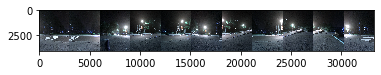

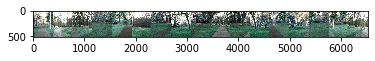

In [39]:
f = open('testfile.txt', 'r')
dirname = str(f.readline()).strip()
while(dirname):
    imageout=SIFT(dirname)
    plt.figure()
    plt.imshow(imageout)
    cv2.imwrite(dirname+'.jpg', imageout)
    dirname = str(f.readline()).strip()